In [1]:
# Load packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6) 

Populating the interactive namespace from numpy and matplotlib


In [4]:
# to customize the displayed area of the dataframe 
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [8]:
df           = pd.read_csv("C:/Users/SAMRUDDHI/data/train_ver2.csv",
                           dtype={"sexo":str, "ind_nuevo":str, 
                                  "ult_fec_cli_1t":str, 
                                  "indext":str}, nrows=7e6) 

unique_ids   = pd.Series(df["ncodpers"].unique())
unique_id    = unique_ids.sample(n=130000)
df           = df[df.ncodpers.isin(unique_id)]

In [9]:
# Records count
df["ncodpers"].count()

1007077

In [10]:
# Change datatype
df["age"]   = pd.to_numeric(df["age"], errors="coerce") 
df["antiguedad"]   = pd.to_numeric(df["antiguedad"], errors="coerce") 
df["indrel_1mes"]   = pd.to_numeric(df["indrel_1mes"], errors="coerce") 

In [11]:
# Check how many missing values in every column
df.isnull().sum()

fecha_dato                     0
ncodpers                       0
ind_empleado                3880
pais_residencia             3880
sexo                        3880
age                         3880
fecha_alta                  3880
ind_nuevo                   3880
antiguedad                  3880
indrel                      3880
ult_fec_cli_1t           1005361
indrel_1mes                15080
tiprel_1mes                15040
indresi                     3880
indext                      3880
conyuemp                 1006894
canal_entrada              17014
indfall                     3880
tipodom                     3880
cod_prov                    9054
nomprov                     9054
ind_actividad_cliente       3880
renta                     179230
segmento                   17205
ind_ahor_fin_ult1              0
ind_aval_fin_ult1              0
ind_cco_fin_ult1               0
ind_cder_fin_ult1              0
ind_cno_fin_ult1               0
ind_ctju_fin_ult1              0
ind_ctma_f

In [12]:
df = df.drop(["ult_fec_cli_1t", "conyuemp"], axis=1)

Text(0, 0.5, 'Number of customers')

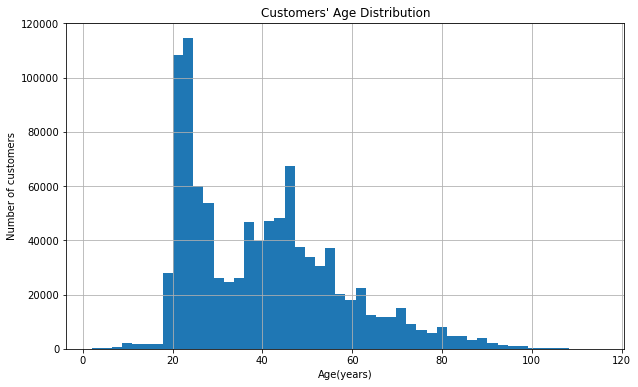

In [15]:
df['age'].hist(bins=50)
plt.title("Customers' Age Distribution")
plt.xlabel("Age(years)")
plt.ylabel("Number of customers") 

In [16]:
# Customers count by channel 
df['canal_entrada'].value_counts().head(15)

KHE    329923
KAT    253835
KFC    229714
KFA     31287
KHK     17107
KHQ     11108
KHD      9100
KAS      6529
KAG      5897
RED      5453
KAY      4958
KAA      4701
KAB      4463
KHM      4191
KAE      4038
Name: canal_entrada, dtype: int64

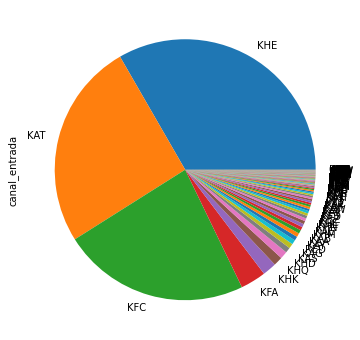

In [17]:
df["canal_entrada"].value_counts().plot(x=None, y=None, kind='pie') 

In [37]:
# Number of products by activity index and sex¶
df_a = df.loc[:, ['sexo', 'ind_actividad_cliente']].join(df.loc[:, "ind_ahor_fin_ult1": "ind_recibo_ult1"])
df_a = df_a.groupby(['sexo', 'ind_actividad_cliente']).sum()
df_a = df_a.T
df_a.head()

sexo                          H                   V          
ind_actividad_cliente       0.0       1.0       0.0       1.0
ind_ahor_fin_ult1          29.0      24.0      19.0      84.0
ind_aval_fin_ult1           0.0       0.0       0.0       9.0
ind_cco_fin_ult1       175993.0  155592.0  167911.0  208933.0
ind_cder_fin_ult1           0.0     120.0      42.0     240.0
ind_cno_fin_ult1          544.0   34421.0     650.0   50542.0

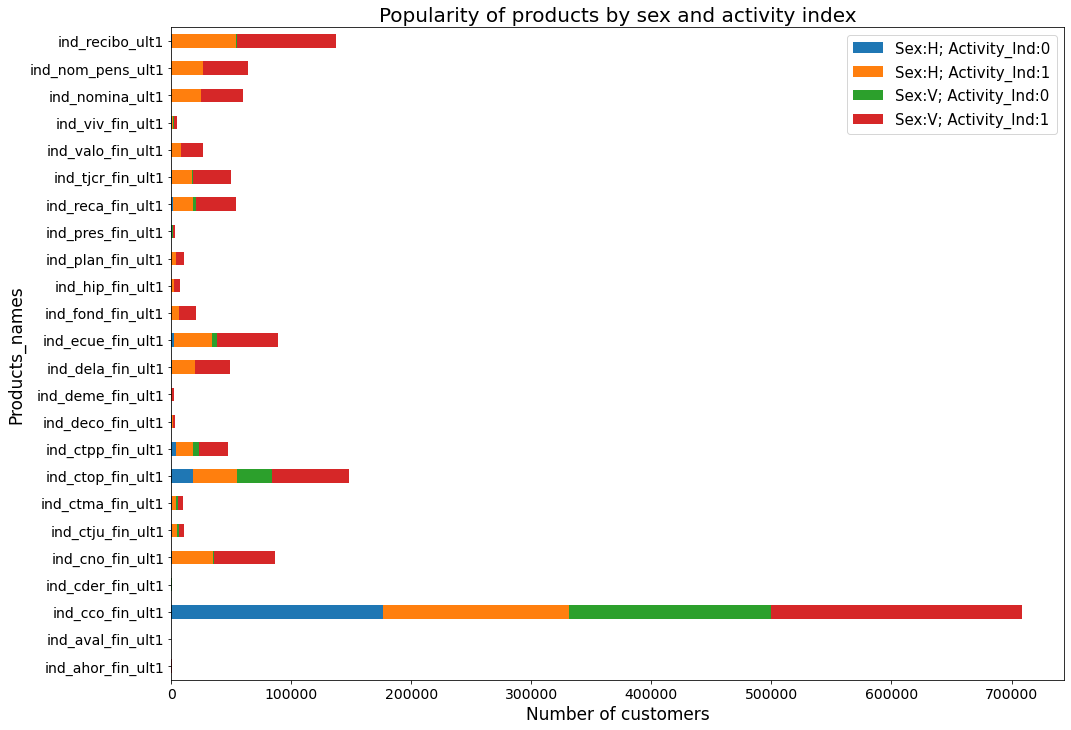

In [38]:
df_a.plot(kind='barh', stacked=True, fontsize=14, figsize=[16,12])
plt.title('Popularity of products by sex and activity index', fontsize=20) 
plt.xlabel('Number of customers', fontsize=17) 
plt.ylabel('Products_names', fontsize=17) 
plt.legend(["Sex:H; Activity_Ind:0", "Sex:H; Activity_Ind:1", "Sex:V; Activity_Ind:0", 
            "Sex:V; Activity_Ind:1"], prop={'size':15}) 

In [39]:
# excluding the dominant product 
exclude = ['ind_cco_fin_ult1']
df_a = df_a.T
df_a = df_a.drop(exclude, axis=1).T

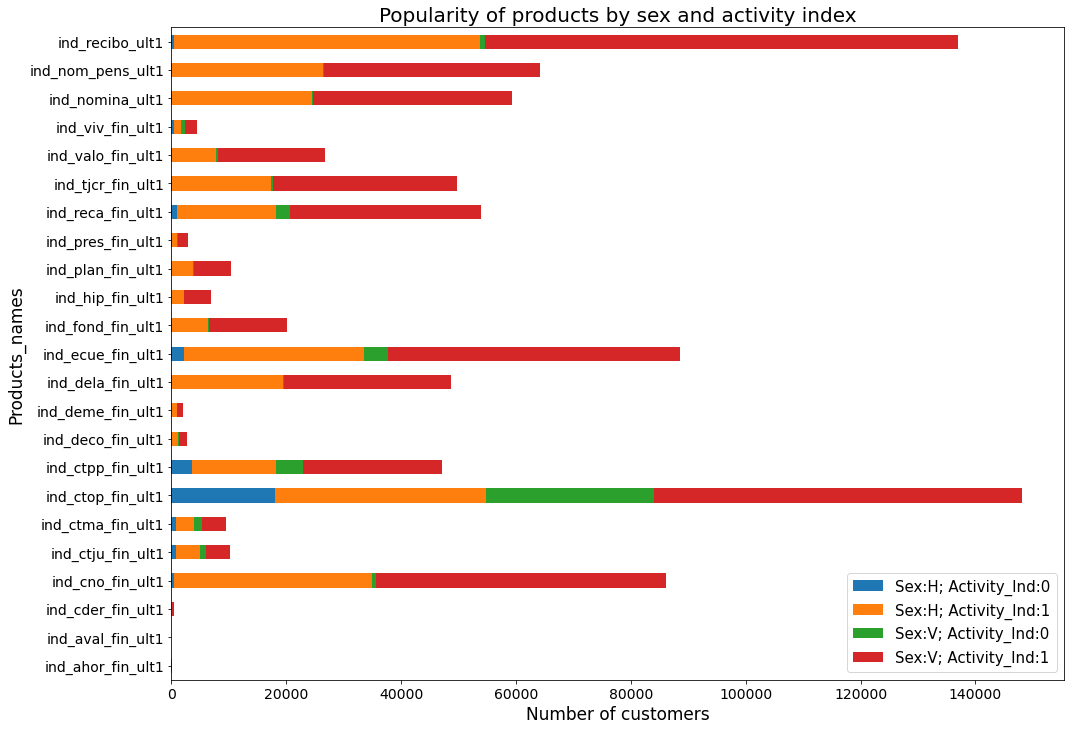

In [40]:
df_a.plot(kind='barh', stacked=True, fontsize=14, figsize=[16,12])
plt.title('Popularity of products by sex and activity index', fontsize=20, color='black') 
plt.xlabel('Number of customers', fontsize=17, color='black') 
plt.ylabel('Products_names', fontsize=17, color='black') 
plt.legend(["Sex:H; Activity_Ind:0", "Sex:H; Activity_Ind:1", "Sex:V; Activity_Ind:0", 
            "Sex:V; Activity_Ind:1"], prop={'size':15})

In [41]:
# Add a new column of the total number of products per customer per month
df["tot_products"] = df.loc[:,"ind_ahor_fin_ult1":"ind_recibo_ult1"].sum(axis=1)
df["tot_products"]   = pd.to_numeric(df["tot_products"], errors="coerce") 
df["tot_products"].value_counts()

1.0     568679
2.0     152723
0.0     125881
3.0      62254
4.0      35428
5.0      22938
6.0      16968
7.0      11580
8.0       6400
9.0       2733
10.0       966
11.0       359
12.0       149
13.0        19
Name: tot_products, dtype: int64

In [51]:
df_a = df.groupby(['age'])['tot_products'].agg('sum')

In [52]:
df_a.sort_values(ascending=False).head(20)

age
23.0    61725.0
22.0    55188.0
24.0    53640.0
44.0    51862.0
43.0    51861.0
45.0    50637.0
42.0    50016.0
46.0    47942.0
47.0    47163.0
41.0    46735.0
21.0    46423.0
48.0    44094.0
40.0    40742.0
49.0    37961.0
50.0    37823.0
39.0    36032.0
51.0    35368.0
25.0    35154.0
53.0    31647.0
52.0    31321.0
Name: tot_products, dtype: float64

Text(0, 0.5, 'Number of products')

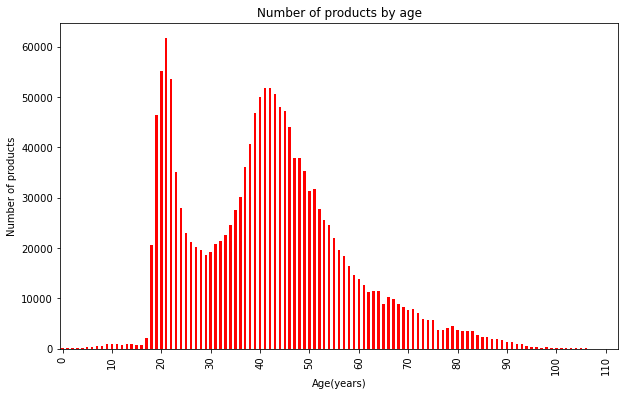

In [53]:
# Number of products by age 
df_a.plot(kind='bar', colormap='autumn', legend=None) 
plt.xticks(np.arange(0, 120, 10), [str(x) for x in np.arange(0, 120, 10)])
plt.title('Number of products by age') 
plt.xlabel('Age(years)') 
plt.ylabel('Number of products') 

In [54]:
df_a = df.groupby(['segmento'])['tot_products'].agg('sum') 
df_a

segmento
01 - TOP               186078.0
02 - PARTICULARES     1007005.0
03 - UNIVERSITARIO     386620.0
Name: tot_products, dtype: float64

In [55]:
df_a = df.groupby(['ind_nuevo'])['tot_products'].agg('count') 
df_a

ind_nuevo
 0    963347
 1     39850
Name: tot_products, dtype: int64

In [56]:
df_a = df.groupby(['indrel'])['tot_products'].agg('count') 
df_a

indrel
1.0     1001481
99.0       1716
Name: tot_products, dtype: int64

In [57]:
df_a = df.groupby(['indrel_1mes'])['tot_products'].agg('count') 
df_a

indrel_1mes
1.0    991720
2.0        59
3.0       203
4.0        15
Name: tot_products, dtype: int64

In [58]:
df_a = df.groupby(['tiprel_1mes'])['tot_products'].agg('count') 
df_a

tiprel_1mes
A    480218
I    511561
P       218
R        40
Name: tot_products, dtype: int64

In [59]:
df_a = df.groupby(['indext'])['tot_products'].agg('count') 
df_a

indext
N    958137
S     45060
Name: tot_products, dtype: int64

In [60]:
df_a = (df.groupby(pd.cut(df['renta'], [0,60000,120000,180000,240000, pd.np.inf], right=False))
                     .sum())

<ipython-input-60-50f1078aa1af>:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  df_a = (df.groupby(pd.cut(df['renta'], [0,60000,120000,180000,240000, pd.np.inf], right=False))


In [61]:
# Let's drop the columns which are unnecessary for this step
df_a = df_a.loc[:, "ind_ahor_fin_ult1": "ind_recibo_ult1"]
df_a = df_a.T

In [62]:
df_a.head(10)

renta,"[0.0, 60000.0)","[60000.0, 120000.0)","[120000.0, 180000.0)","[180000.0, 240000.0)","[240000.0, inf)"
ind_ahor_fin_ult1,0.0,39.0,20.0,48.0,25.0
ind_aval_fin_ult1,0.0,9.0,0.0,0.0,0.0
ind_cco_fin_ult1,111016.0,254329.0,116024.0,49924.0,50297.0
ind_cder_fin_ult1,31.0,96.0,74.0,96.0,51.0
ind_cno_fin_ult1,10032.0,29550.0,18561.0,8837.0,8548.0
ind_ctju_fin_ult1,779.0,2896.0,2557.0,1445.0,1193.0
ind_ctma_fin_ult1,1120.0,3490.0,1883.0,1120.0,630.0
ind_ctop_fin_ult1,13384.0,46715.0,32358.0,16997.0,17068.0
ind_ctpp_fin_ult1,4053.0,15209.0,10107.0,5733.0,5452.0
ind_deco_fin_ult1,293.0,977.0,535.0,223.0,150.0


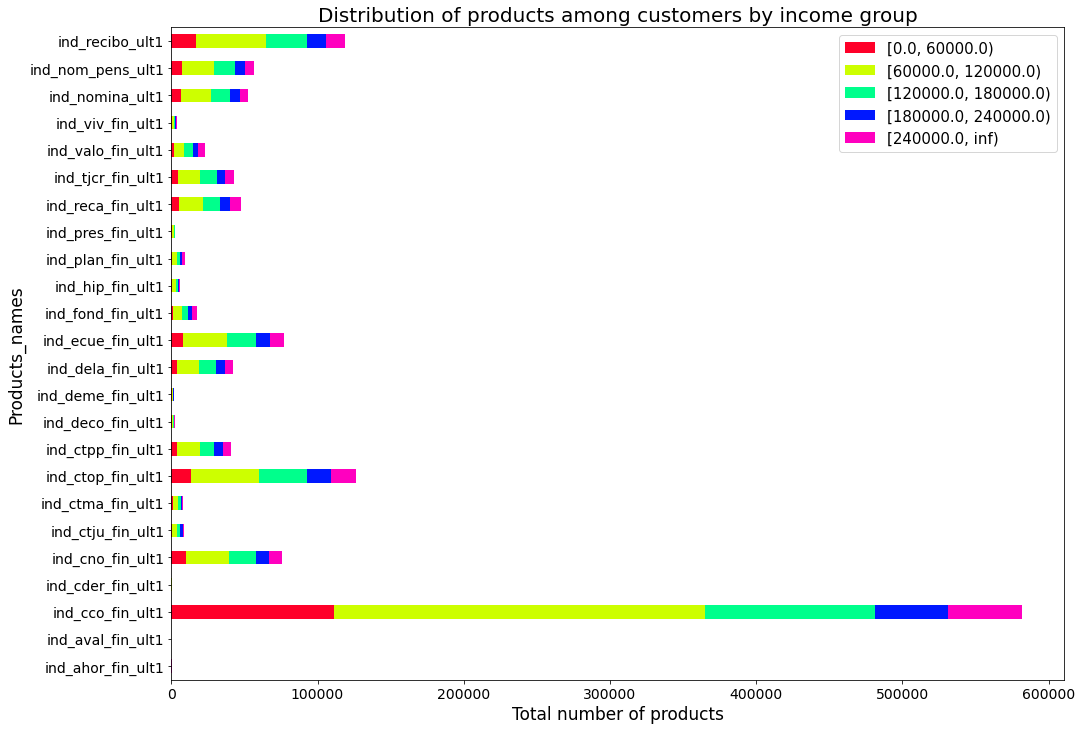

In [63]:
# Plot of product share for each income group
df_a.plot(kind='barh', stacked=True, fontsize=14, figsize=[16,12], colormap='gist_rainbow')
plt.title('Distribution of products among customers by income group', fontsize=20, color='black') 
plt.xlabel('Total number of products', fontsize=17, color='black') 
plt.ylabel('Products_names', fontsize=17, color='black') 
plt.legend(prop={'size':15}, loc=1) 

In [64]:
# exclude the dominant product "ind_cco_fin_ult1"
exclude = ['ind_cco_fin_ult1']
df_a = df_a.T
df_a = df_a.drop(exclude, axis=1).T

In [65]:
df_a.head()

renta,"[0.0, 60000.0)","[60000.0, 120000.0)","[120000.0, 180000.0)","[180000.0, 240000.0)","[240000.0, inf)"
ind_ahor_fin_ult1,0.0,39.0,20.0,48.0,25.0
ind_aval_fin_ult1,0.0,9.0,0.0,0.0,0.0
ind_cder_fin_ult1,31.0,96.0,74.0,96.0,51.0
ind_cno_fin_ult1,10032.0,29550.0,18561.0,8837.0,8548.0
ind_ctju_fin_ult1,779.0,2896.0,2557.0,1445.0,1193.0


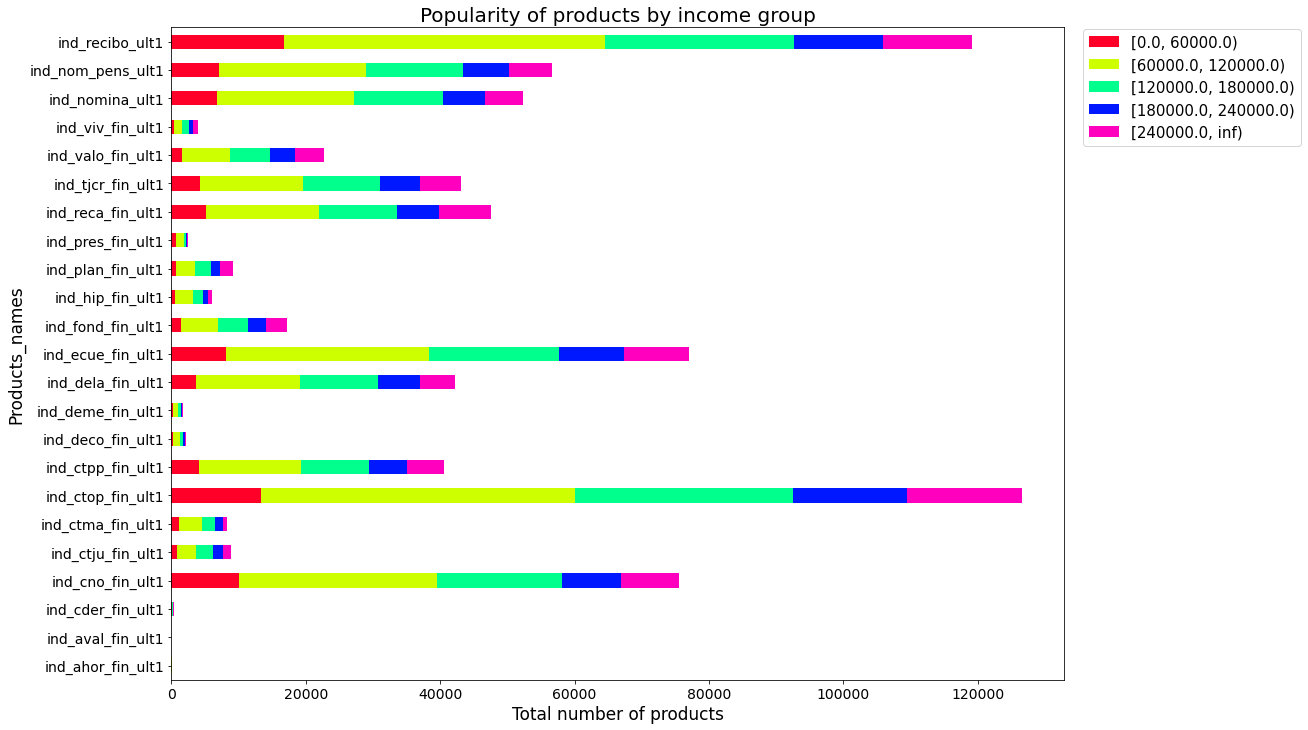

In [66]:
# Plot of product share for each income group; excluding the dominant product 
df_a.plot(kind='barh', stacked=True, fontsize=14, figsize=[16,12], colormap='gist_rainbow')
plt.title('Popularity of products by income group', fontsize=20, color='black') 
plt.xlabel('Total number of products', fontsize=17, color='black') 
plt.ylabel('Products_names', fontsize=17, color='black') 
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.1, prop={'size':15}) 

In [67]:
# Let's create age groups
df_a = (df.groupby(pd.cut(df['age'], [0,20,40,60,80,100, pd.np.inf], right=False))
                     .sum())

<ipython-input-67-c30f0bb1f409>:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  df_a = (df.groupby(pd.cut(df['age'], [0,20,40,60,80,100, pd.np.inf], right=False))


In [68]:
# Keep the products columns and discard the others
df_a = df_a.loc[:, "ind_ahor_fin_ult1": "ind_recibo_ult1"]
df_a = df_a.T

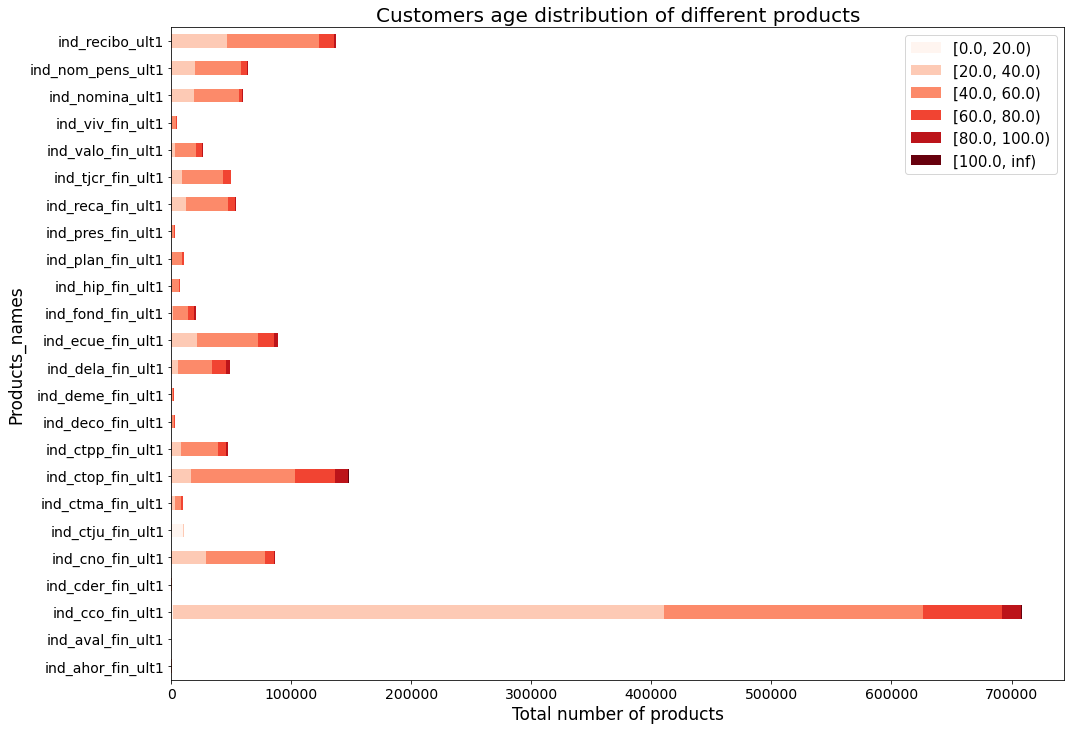

In [70]:
# Plot of customers' age distibution of each product 
df_a.plot(kind='barh', stacked=True, fontsize=14, figsize=[16,12], colormap='Reds')
plt.title('Customers age distribution of different products', fontsize=20, color='black') 
plt.xlabel('Total number of products', fontsize=17, color='black') 
plt.ylabel('Products_names', fontsize=17, color='black') 
plt.legend(prop={'size':15}, loc=1) 

In [71]:
# exclude the dominant product "ind_cco_fin_ult1"
exclude = ['ind_cco_fin_ult1']
df_a = df_a.T
df_a = df_a.drop(exclude, axis=1).T

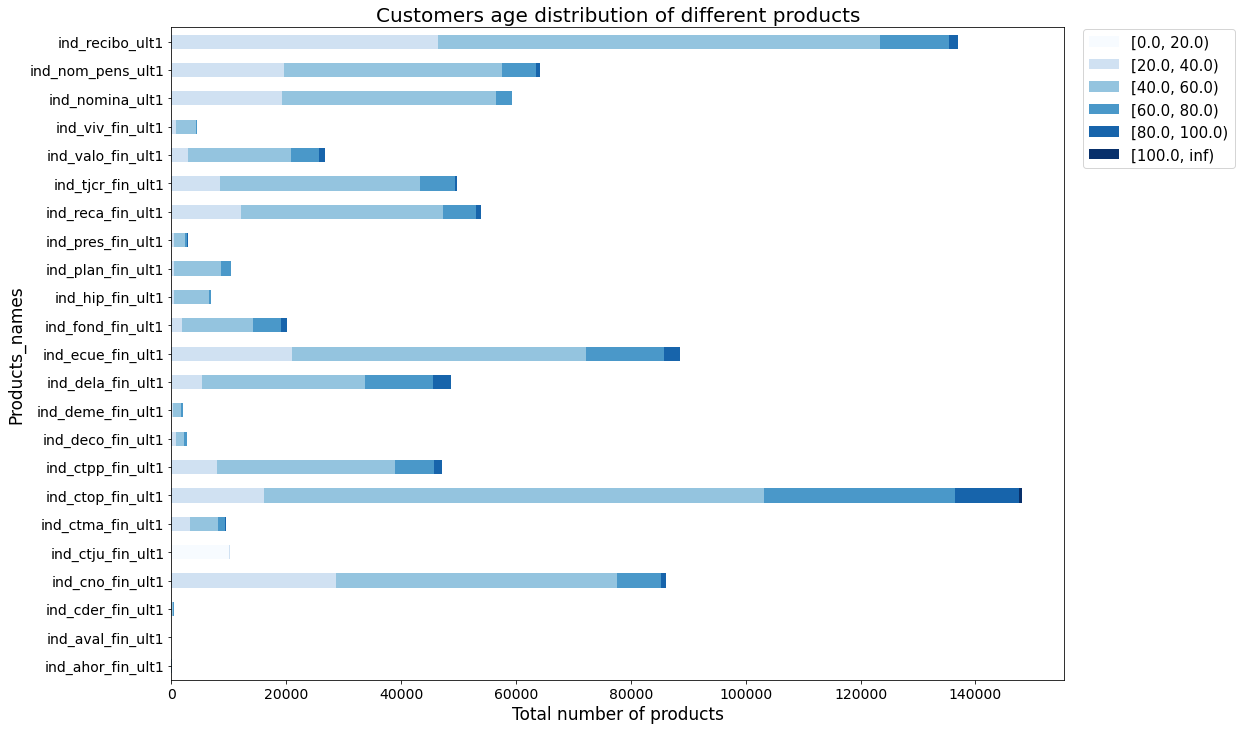

In [72]:
# Plot of customers' age distibution of each product (excluding the dominant product) 
df_a.plot(kind='barh', stacked=True, fontsize=14, figsize=[16,12], colormap='Blues')
plt.title('Customers age distribution of different products', fontsize=20, color='black') 
plt.xlabel('Total number of products', fontsize=17, color='black') 
plt.ylabel('Products_names', fontsize=17, color='black') 
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.1, prop={'size':15}) 

In [73]:
df["canal_entrada"].value_counts().head(10)

KHE    329923
KAT    253835
KFC    229714
KFA     31287
KHK     17107
KHQ     11108
KHD      9100
KAS      6529
KAG      5897
RED      5453
Name: canal_entrada, dtype: int64

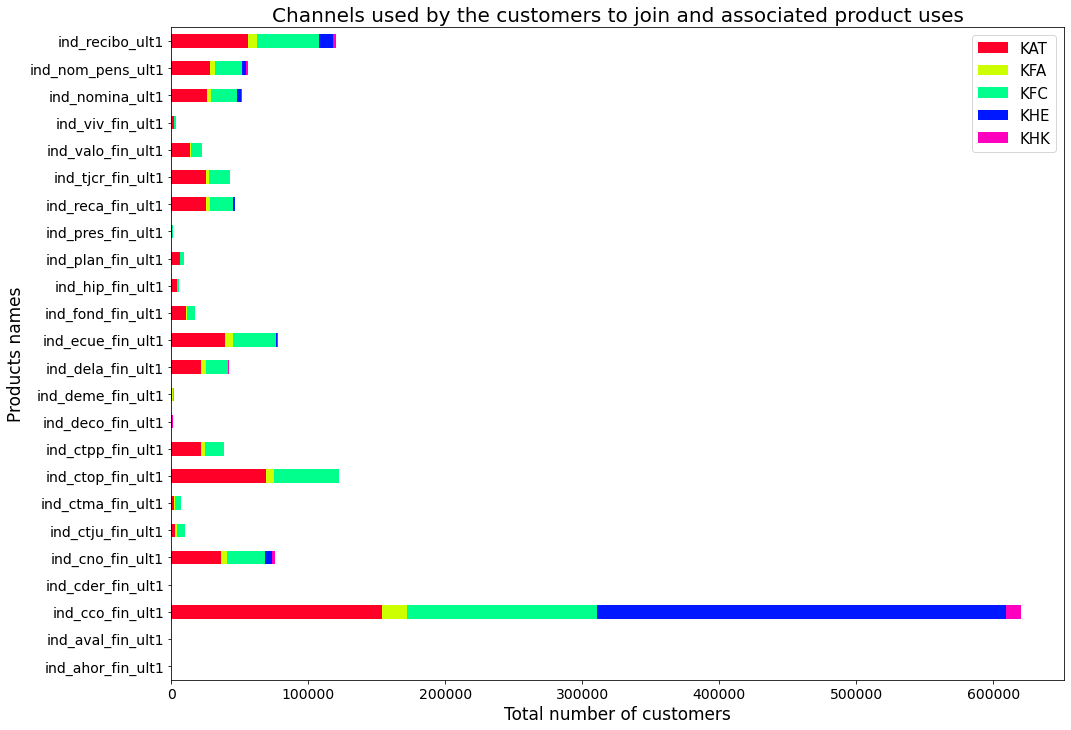

In [74]:
# Let's extract the necessary columns for this step
df_a = df.loc[:, ['canal_entrada']].join(df.loc[:, 'ind_ahor_fin_ult1':'ind_recibo_ult1'])

# Let's subset the data to keep only the records from the five major channels
subset = ["KHE", "KAT", "KFC", "KFA", "KHK"]
df_a = df_a.loc[df_a['canal_entrada'].isin(subset)]

df_a = df_a.groupby("canal_entrada").agg("sum")
df_a = df_a.T

# Channels used by the customer to join and the purchased products
df_a.plot(kind='barh', stacked=True, fontsize=14, figsize=[16,12], colormap='gist_rainbow')
plt.title('Channels used by the customers to join and associated product uses', fontsize=20, color='black') 
plt.xlabel('Total number of customers', fontsize=17, color='black') 
plt.ylabel('Products names', fontsize=17, color='black') 
plt.legend(prop={'size':15}) 

In [75]:
# exclude the dominant product "ind_cco_fin_ult1"
exclude = ['ind_cco_fin_ult1']
df_a = df_a.T
df_a = df_a.drop(exclude, axis=1).T

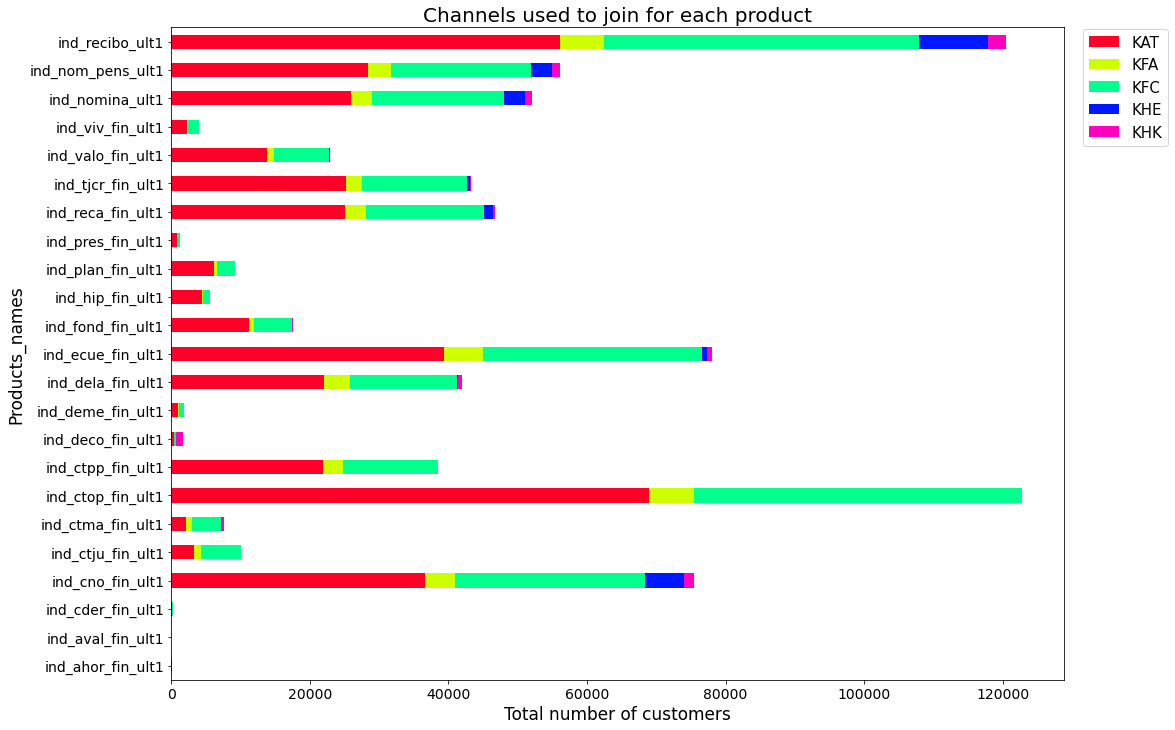

In [76]:
# Channels share distribution of each product, excluding the dominant product
df_a.plot(kind='barh', stacked=True, fontsize=14, figsize=[16,12], colormap='gist_rainbow')
plt.title('Channels used to join for each product', fontsize=20, color='black') 
plt.xlabel('Total number of customers', fontsize=17, color='black') 
plt.ylabel('Products_names', fontsize=17, color='black') 
plt.legend(["KAT", "KFA", "KFC", "KHE", "KHK"], prop={'size':15}, loc=1) 
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.1, prop={'size':15}) 

<ipython-input-77-2656240f2b41>:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  df_a = (df_a.groupby(pd.cut(df_a['age'], [0,18,25,35,45,55, pd.np.inf], right=False))


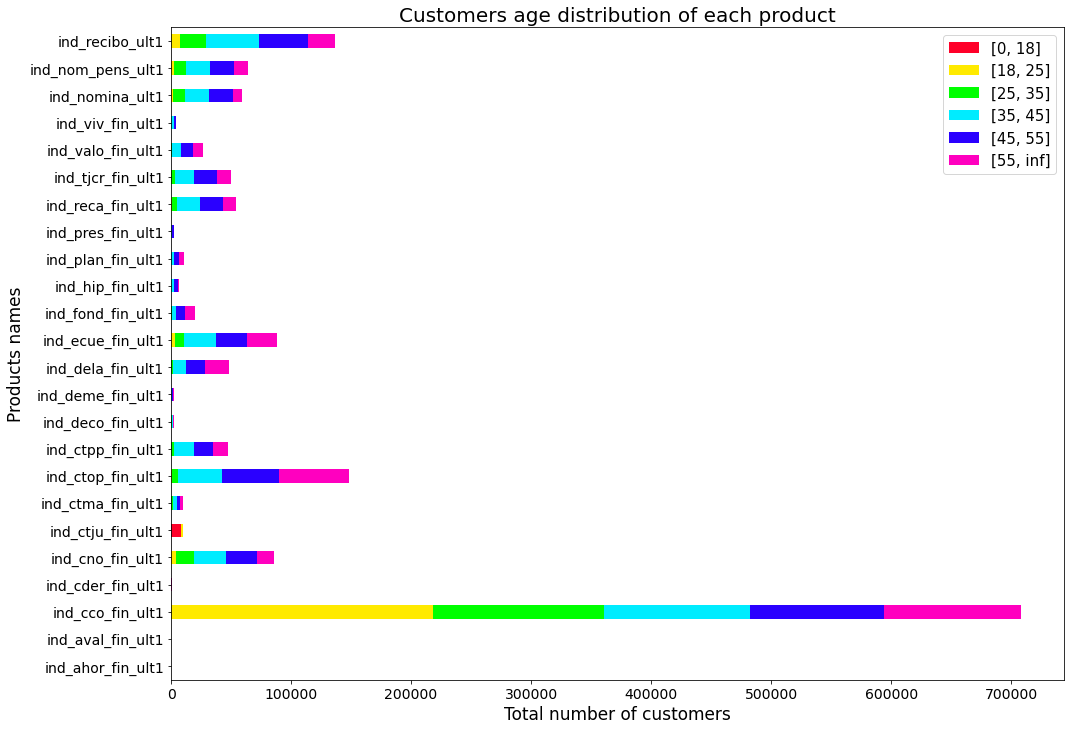

In [77]:
df_a = df.loc[:, ['age']].join(df.loc[:, 'ind_ahor_fin_ult1':'ind_recibo_ult1'])
df_a = (df_a.groupby(pd.cut(df_a['age'], [0,18,25,35,45,55, pd.np.inf], right=False))
                     .sum())
del df_a["age"]
df_a = df_a.T

# Customers age distribution of each product
df_a.plot(kind='barh', stacked=True, fontsize=14, figsize=[16,12], colormap='gist_rainbow')
plt.title('Customers age distribution of each product', fontsize=20, color='black') 
plt.xlabel('Total number of customers', fontsize=17, color='black') 
plt.ylabel('Products names', fontsize=17, color='black') 
plt.legend([[0, 18], [18, 25], [25, 35], [35, 45], [45, 55], [55, inf]], prop={'size':15}) 

In [80]:
df_a = df.loc[:,["age"]].join(df.loc[:, 'ind_ahor_fin_ult1':'ind_recibo_ult1'])

fnc = {c:'sum' for c in df_a.columns.drop(['age']).tolist()}
fnc['age'] = 'mean' 